In [1]:
import warnings
# Ignore all warnings (not recommended in general)
warnings.filterwarnings('ignore')

# Regressors

In [2]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('catfood_prepared.csv')

# Show general information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            121 non-null    float64
 1   weight           121 non-null    float64
 2   star_rating      121 non-null    float64
 3   total_comments   121 non-null    float64
 4   adult            121 non-null    float64
 5   chicken          121 non-null    float64
 6   wet              121 non-null    float64
 7   from_ocean       121 non-null    float64
 8   company_farmina  121 non-null    int64  
 9   company_me-o     121 non-null    int64  
 10  company_meat     121 non-null    int64  
 11  company_purepet  121 non-null    int64  
 12  company_purina   121 non-null    int64  
 13  company_royal    121 non-null    int64  
 14  company_sheba    121 non-null    int64  
 15  company_whiskas  121 non-null    int64  
dtypes: float64(8), int64(8)
memory usage: 15.2 KB
None


## Preprocessing

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate features and target
X = data.drop(columns=['star_rating'])
y = data['star_rating']

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 4. Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predictions
y_pred = model.predict(X_test)

# 6. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.1925
R² Score: 0.0656


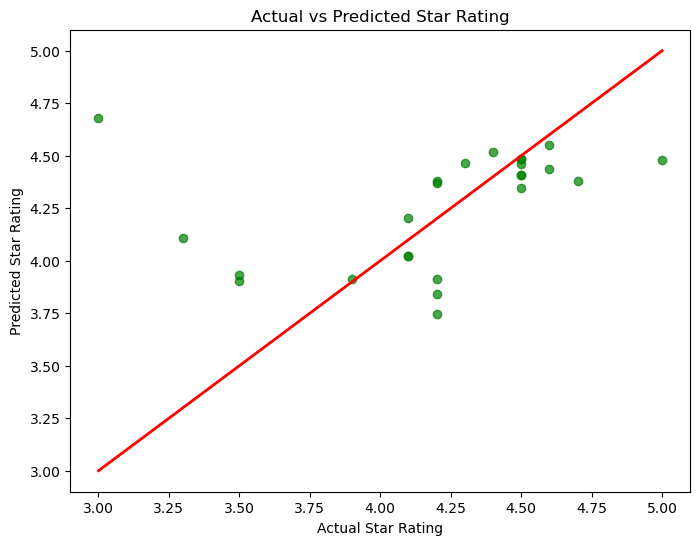

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.xlabel('Actual Star Rating')
plt.ylabel('Predicted Star Rating')
plt.title('Actual vs Predicted Star Rating')
# Add a reference line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.show()


## FFNN Regressor

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 5. Build the FFNN Regressor
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Linear output for regression
])

# 6. Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',          # Mean Squared Error for regression
    metrics=['mae']       # Mean Absolute Error for readability
)

# 7. Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

# 8. Evaluate
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")

Epoch 1/50
5/5 [==============================] - 1s 64ms/step - loss: 15.2287 - mae: 3.8733 - val_loss: 15.1881 - val_mae: 3.8745
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 13.0056 - mae: 3.5659 - val_loss: 12.7332 - val_mae: 3.5414
Epoch 3/50
5/5 [==============================] - 0s 14ms/step - loss: 10.7534 - mae: 3.2218 - val_loss: 10.3609 - val_mae: 3.1849
Epoch 4/50
5/5 [==============================] - 0s 13ms/step - loss: 8.3333 - mae: 2.8114 - val_loss: 8.0686 - val_mae: 2.7953
Epoch 5/50
5/5 [==============================] - 0s 14ms/step - loss: 6.1844 - mae: 2.3858 - val_loss: 5.9884 - val_mae: 2.3833
Epoch 6/50
5/5 [==============================] - 0s 12ms/step - loss: 4.3483 - mae: 1.9098 - val_loss: 4.1901 - val_mae: 1.9527
Epoch 7/50
5/5 [==============================] - 0s 14ms/step - loss: 3.4243 - mae: 1.6658 - val_loss: 2.7244 - val_mae: 1.5068
Epoch 8/50
5/5 [==============================] - 0s 11ms/step - loss: 2.1354 - mae: 1.2723

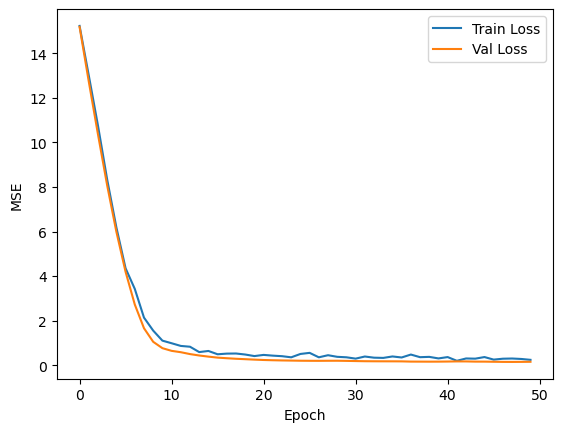

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()


1/1 [==============================] - 0s 35ms/step


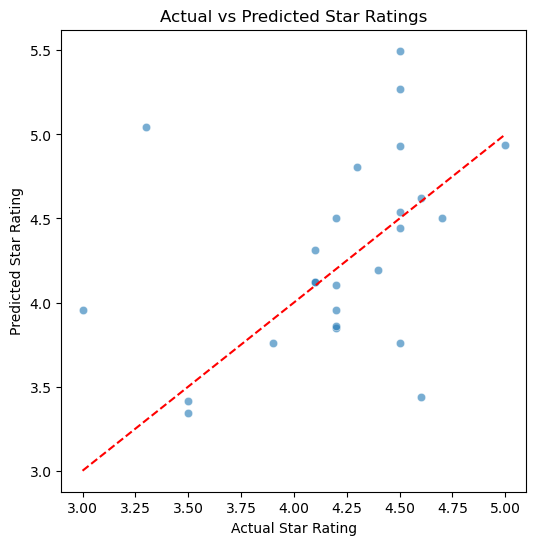

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data
y_pred = model.predict(X_test).flatten()

# Scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel("Actual Star Rating")
plt.ylabel("Predicted Star Rating")
plt.title("Actual vs Predicted Star Ratings")
plt.show()
